# Exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [2]:
# Load the dataframe and parse the dates

date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
df = pd.read_csv('sales.csv',
                 index_col = 'InvoiceDate',
                 parse_dates=['InvoiceDate'],
                 date_parser = date_parser,
                 dtype={
                     'Invoice' : 'string'
                 })
df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1044416 entries, 2009-12-01 07:45:00 to 2011-12-09 12:50:00
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1044416 non-null  string 
 1   StockCode    1044416 non-null  object 
 2   Description  1042723 non-null  object 
 3   Quantity     1044416 non-null  int64  
 4   Price        1044416 non-null  float64
 5   Customer ID  805620 non-null   float64
 6   Country      1044416 non-null  object 
dtypes: float64(2), int64(1), object(3), string(1)
memory usage: 63.7+ MB


In [4]:
non_nb = [x for x in df['Invoice'] if x.isnumeric() is False]
non_nb

['C496350', 'A563185']

# Univariate analysis

In [5]:
df['Revenue'] = df['Price'] * df['Quantity']
df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue
InvoiceDate,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.4
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.0
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.0
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.8
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.0


In [6]:
df[df['Quantity'] > 1000].value_counts()

Invoice  StockCode  Description                         Quantity  Price  Customer ID  Country         Revenue  
536830   84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS   2880      0.18   16754.0      United Kingdom  518.40       2
537659   22188      BLACK HEART CARD HOLDER             1008      2.31   18102.0      United Kingdom  2328.48      2
561873   84568      GIRLS ALPHABET IRON ON PATCHES      1440      0.17   13316.0      United Kingdom  244.80       2
537981   22492      MINI PAINT SET VINTAGE              1394      0.55   17857.0      United Kingdom  766.70       2
537899   22328      ROUND SNACK BOXES SET OF 4 FRUITS   1488      2.55   12755.0      Japan           3794.40      2
                                                                                                                  ..
518505   16047      POP ART PEN CASE & PENS             5184      0.08   14277.0      France          414.72       1
         16046      TEATIME PEN CASE & PENS             4608      0.0

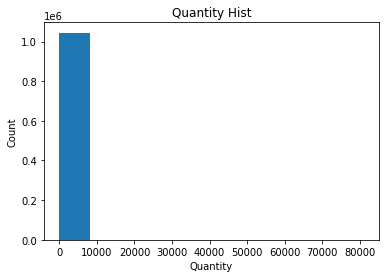

In [7]:
# bins = [i for i in range(0, 1000, 50)]

plt.hist(df['Quantity'])
plt.ylabel('Count')
plt.xlabel('Quantity')
plt.title('Quantity Hist')
plt.show()

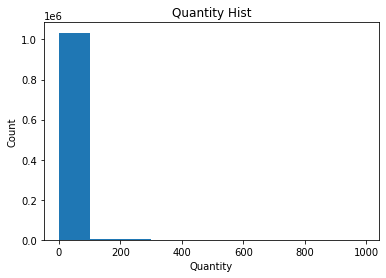

In [8]:
plt.hist(df['Quantity'][df['Quantity'] < 1000])
plt.ylabel('Count')
plt.xlabel('Quantity')
plt.title('Quantity Hist')
plt.show()

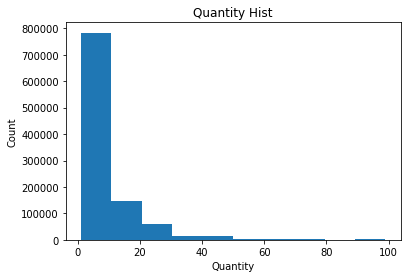

In [9]:
plt.hist(df['Quantity'][df['Quantity'] < 100])
plt.ylabel('Count')
plt.xlabel('Quantity')
plt.title('Quantity Hist')
plt.show()

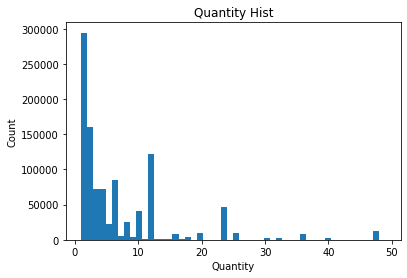

In [10]:
plt.hist(df['Quantity'][df['Quantity'] < 50] , bins = 50)
plt.ylabel('Count')
plt.xlabel('Quantity')
plt.title('Quantity Hist')
plt.show()

In [11]:
print((len(df[df['Quantity'] <= 50]) - len(df[df['Quantity'] > 50])) / len(df) * 100)

95.2570623199951


The distribution of the quantity attribute is right-skewed, while having ~95.25% of the recored data in the [0, 50] range and a maximum of 80995.     

In [12]:
log_transformed_quantity = np.log(df['Quantity'])

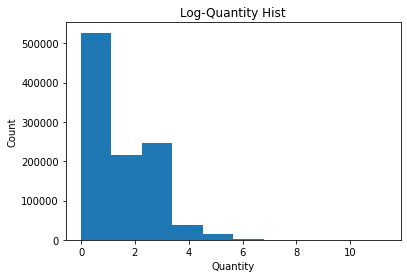

In [13]:
plt.hist(log_transformed_quantity)
plt.ylabel('Count')
plt.xlabel('Quantity')
plt.title('Log-Quantity Hist')
plt.show()

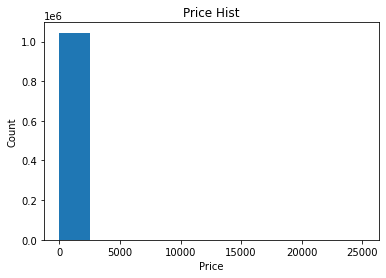

In [14]:
plt.hist(df['Price'])
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Price Hist')
plt.show()

In [15]:
df[df['Price'] > 1000].value_counts()

Invoice  StockCode  Description     Quantity  Price     Customer ID  Country         Revenue 
491176   M          Manual          1         1213.02   13091.0      United Kingdom  1213.02     1
546329   M          Manual          1         1687.17   14911.0      EIRE            1687.17     1
548813   M          Manual          1         2382.92   12744.0      Singapore       2382.92     1
548820   M          Manual          1         2053.07   12744.0      Singapore       2053.07     1
548913   M          Manual          1         1136.30   12669.0      France          1136.30     1
549468   M          Manual          1         1867.86   17940.0      United Kingdom  1867.86     1
551697   POST       POSTAGE         1         8142.75   16029.0      United Kingdom  8142.75     1
554155   M          Manual          1         1241.98   12757.0      Portugal        1241.98     1
554301   M          Manual          1         1241.98   12757.0      Portugal        1241.98     1
562946   M     

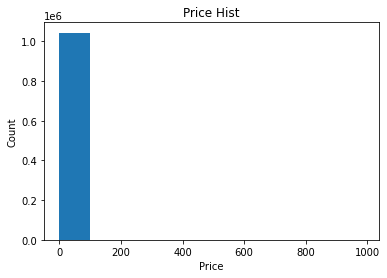

In [16]:
plt.hist(df['Price'][df['Price'] < 1000])
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Price Hist')
plt.show()

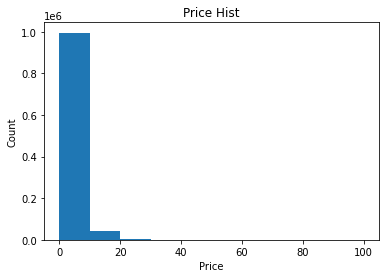

In [17]:
plt.hist(df['Price'][df['Price'] < 100])
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Price Hist')
plt.show()

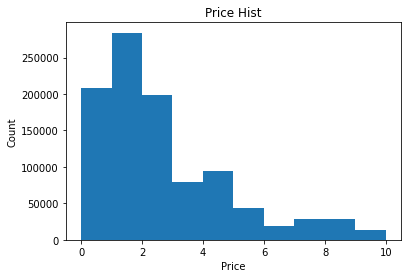

In [18]:
plt.hist(df['Price'][df['Price'] < 10])
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Price Hist')
plt.show()

In [19]:
log_transformed_price = np.log(df['Price'], where=df['Price']>0.00000001)

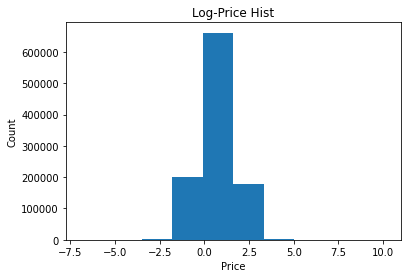

In [20]:
plt.hist(log_transformed_price)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Log-Price Hist')
plt.show()

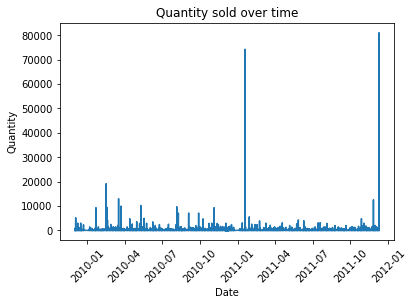

In [21]:
plt.plot(df['Quantity'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Quantity sold over time')
plt.show()

# Bivariate analysis

<AxesSubplot:xlabel='Price', ylabel='Quantity'>

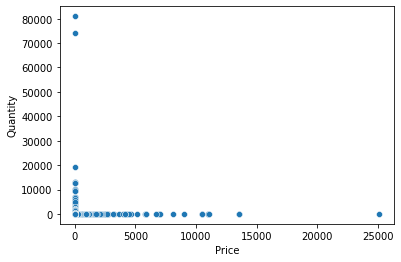

In [22]:
sns.scatterplot(data=df, x='Price', y='Quantity')

In [23]:
new_df = df[(df['Price'] < 30) & (df['Quantity'] < 50)]

<AxesSubplot:xlabel='Price', ylabel='Quantity'>

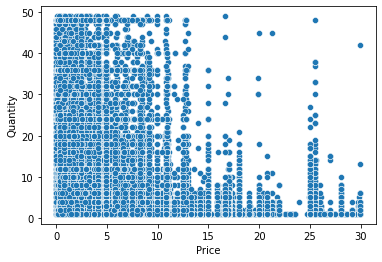

In [24]:
sns.scatterplot(data = new_df, x='Price', y='Quantity')

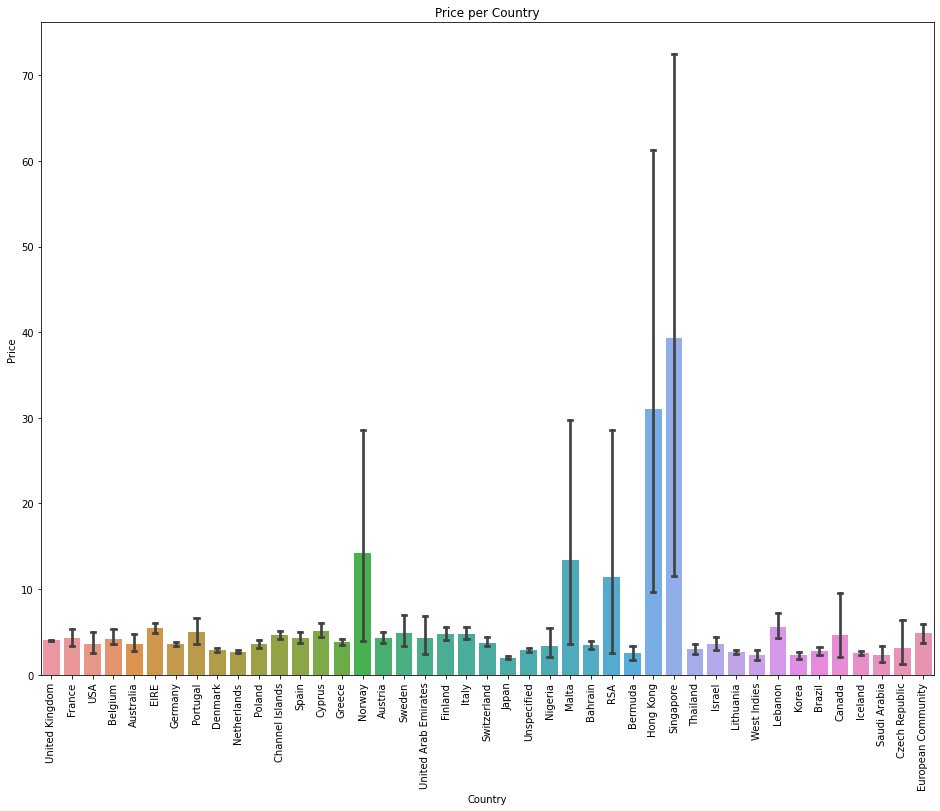

In [34]:
fig = plt.figure(figsize=(16, 12))
sns.barplot(data=df, x=df['Country'], y=df['Price'], capsize=0.2)
plt.xticks(rotation = 90)
plt.title('Price per Country')
plt.show()

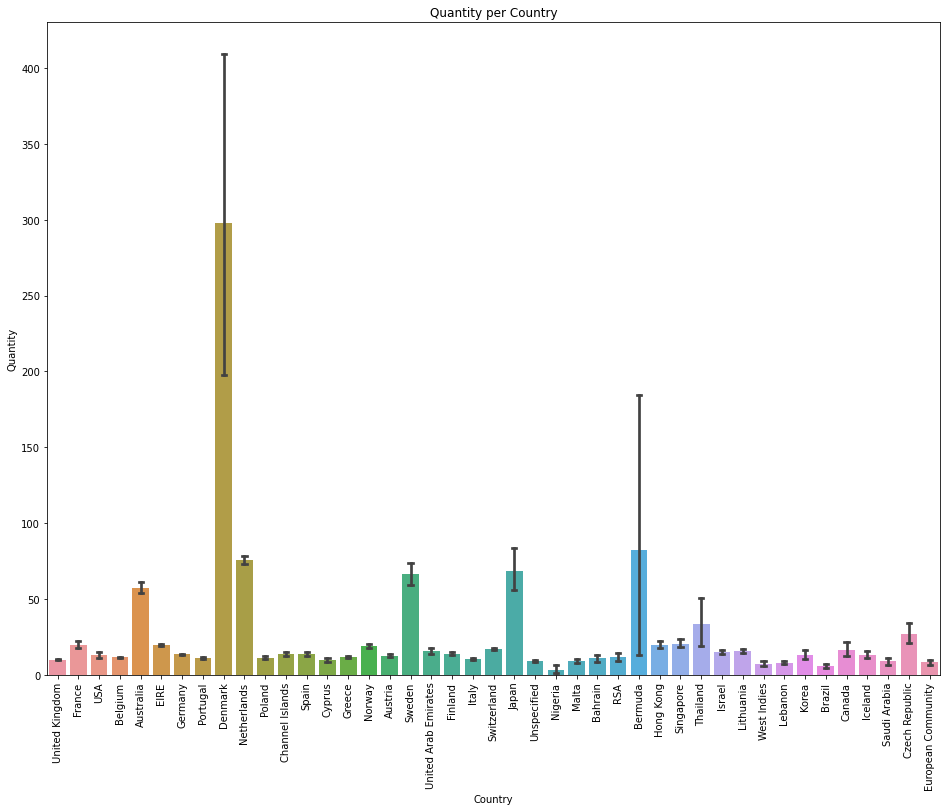

In [35]:
fig = plt.figure(figsize=(16, 12))
sns.barplot(data=df, x='Country', y='Quantity', capsize=0.2)
plt.xticks(rotation = 90)
plt.title('Quantity per Country')
plt.show()

Export the new dataframe with the revenue column

In [36]:
df.to_csv('sales_upd.csv')